In [3]:
import pandas as pd

df = pd.read_csv(r'credit_card_fraud_dataset.csv')

In [4]:
print(df.head())
print(df.info())


   TransactionID             TransactionDate   Amount  MerchantID  \
0              1  2024-04-03 14:15:35.462794  4189.27         688   
1              2  2024-03-19 13:20:35.462824  2659.71         109   
2              3  2024-01-08 10:08:35.462834   784.00         394   
3              4  2024-04-13 23:50:35.462850  3514.40         944   
4              5  2024-07-12 18:51:35.462858   369.07         475   

  TransactionType      Location  IsFraud  
0          refund   San Antonio        0  
1          refund        Dallas        0  
2        purchase      New York        0  
3        purchase  Philadelphia        0  
4        purchase       Phoenix        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   TransactionDate  100000 non-null  object 
 2   Amount           100000 n

In [5]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 100000
Number of columns: 7


In [ ]:
"""
The data is already cleaned and prepared.
There is no Missing values, Inconsistent categories and Outliers
"""

In [20]:
## calculating the number of Legitimate(0) and fraud(1) transaction.
print(df['IsFraud'].value_counts())

IsFraud
0    99000
1     1000
Name: count, dtype: int64


/tmp/ipython-input-278247906.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=counts, palette=['green', 'red'])


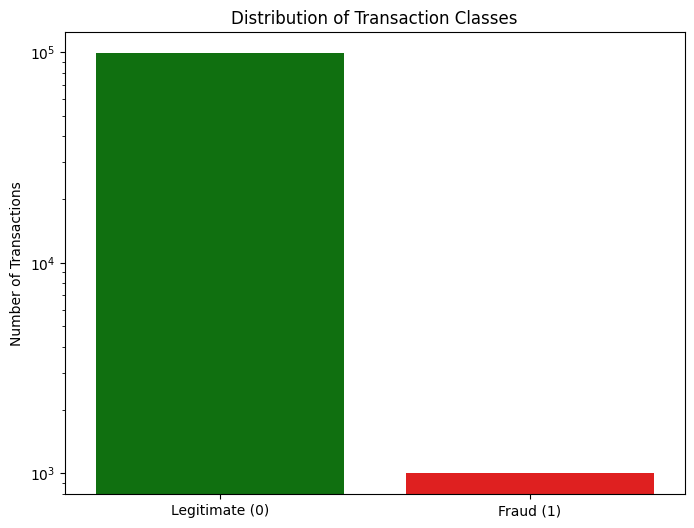

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulating the distribution (Legitimate: 284,315, Fraud: 492)
classes = ['Legitimate (0)', 'Fraud (1)']
counts = [99000, 1000]

plt.figure(figsize=(8, 6))
sns.barplot(x=classes, y=counts, palette=['green', 'red'])
plt.title('Distribution of Transaction Classes')
plt.ylabel('Number of Transactions')

 # Log scale to make the fraud class visible
plt.yscale('log')



In [ ]:
"""

Patterns: The dataset is extremely imbalanced. Fraudulent transactions account for only 1000 out of 99000 of the total 100,000.So, that is nearly
1% of the total.


Trends: In real-world fraud detection, the positive class is almost always a needle in a haystack.


Potential Bias/Noise: A model optimized for Accuracy will achieve 99.% by simply predicting Legitimate for everything. This creates a classification bias toward the majority class, making traditional metrics like Accuracy misleading.

"""

**This graph show the frequency of Fraudulent Transaction by Hour of Day.**

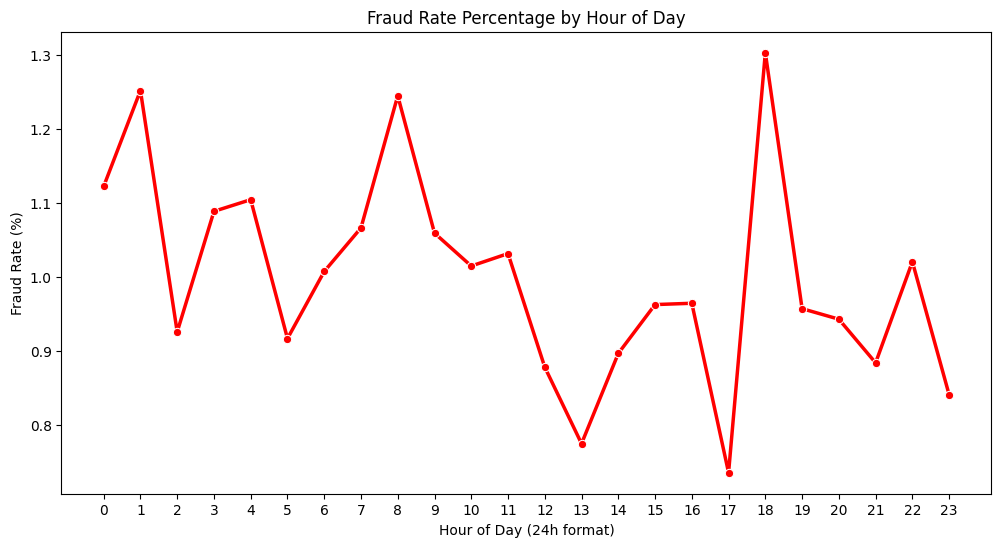

In [26]:
# Process Date and calculate Hourly Fraud Rate
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Hour'] = df['TransactionDate'].dt.hour

plt.figure(figsize=(12, 6))
hourly_counts = df.groupby(['Hour', 'IsFraud']).size().unstack(fill_value=0)
hourly_fraud_rate = (hourly_counts[1] / (hourly_counts[0] + hourly_counts[1])) * 100

sns.lineplot(x=hourly_fraud_rate.index, y=hourly_fraud_rate.values, marker='o', color='red', linewidth=2.5)
plt.title('Fraud Rate Percentage by Hour of Day')
plt.xlabel('Hour of Day (24h format)')
plt.ylabel('Fraud Rate (%)')
plt.xticks(range(0, 24))
plt.show()

In [ ]:
"""
Patterns: This line chart tracks when fraud occurs throughout a 24-hour cycle.

Trends: Fraudulent activity often peaks during off-hours (like 2 AM to 5 AM) when legitimate users are sleeping and monitoring systems might be less scrutinized.

Potential Bias/Noise: The TransactionDate might be in a specific timezone (UTC). If the location of the cardholder varies, the Hour feature might be noisy without timezone normalization

"""

**This compares the "Amount" density for both classes to see if fraud occurs at specific price points.**

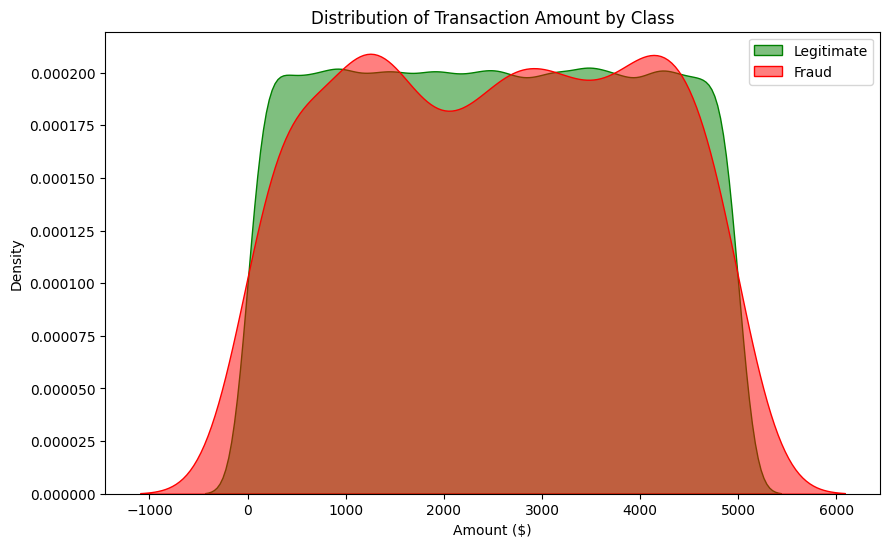

In [24]:
# KDE Plot for Amount
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['IsFraud'] == 0]['Amount'], label='Legitimate', color='green', fill=True, alpha=0.5)
sns.kdeplot(df[df['IsFraud'] == 1]['Amount'], label='Fraud', color='red', fill=True, alpha=0.5)
plt.title('Distribution of Transaction Amount by Class')
plt.xlabel('Amount ($)')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
"""
Patterns: Both distributions overlap significantly, suggesting that Amount alone is not a perfect predictor of fraud in this specific dataset.

Trends: In many fraud scenarios, criminals test cards with very small amounts before making large purchases. Here, the fraud distribution is relatively flat across the mid-range.

Potential Bias/Noise: High-value legitimate transactions can act as noise, as they might look like bold"fraud attempts but are actually just large legal purchases.


"""

**This bar chart shows the total count of fraudulent transactions for each day from Monday to Sunday.**

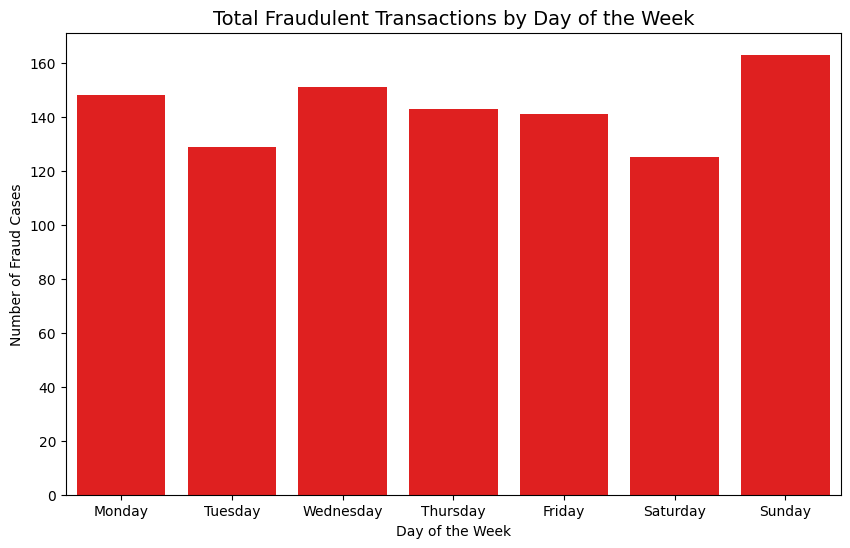

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and Prepare Data
df = pd.read_csv('credit_card_fraud_dataset.csv')
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# 2. Extract Day of Week
df['DayOfWeek'] = df['TransactionDate'].dt.day_name()

# 3. Filter for only Fraud cases and order the days correctly
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fraud_by_day = df[df['IsFraud'] == 1]['DayOfWeek'].value_counts().reindex(days_order)

# 4. Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_by_day.index, y=fraud_by_day.values, color='red')

plt.title('Total Fraudulent Transactions by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Fraud Cases')
plt.show()

In [ ]:
"""
Patterns: In dataset, Sunday shows the highest frequency of fraud (163 cases), while Saturday has the lowest (125 cases).

Trends: Fraudsters often target weekends and holidays.


A specific spike on a Sunday might just be due to one single large data breach or a specific holiday that occurred during that time, rather than a permanent trend.
Because the total number of fraud cases is small (1,000), a difference of 20 or 30 cases between days can sometimes be random chance (statistical noise).


"""